# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1339]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import random

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

In [1340]:
#ваш код 
data = pd.read_csv('data/Advertising.zip', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [1341]:
#ваш код 
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Пропусков в данных нет

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [1342]:
#ваш код 
x = data.drop('sales', axis=1)
y = data['sales']

X = np.array(x)
y = np.array(y)

display(X[:5])
display(y[:5])

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4]])

array([22.1, 10.4,  9.3, 18.5, 12.9])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [1343]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [1344]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [1345]:
# ваш код 
num_iters = 1000 #количество итераций
m = X.shape[0] # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros([X.shape[1],1]) #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))
w

array([[ 41.56217205],
       [110.13144155],
       [ 73.52860638],
       [ -0.55006384]])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [1346]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [1347]:
#ваш код
z=x.copy()

z['TV']=(x['TV']-x['TV'].mean())/x['TV'].std()
z['radio']=(x['radio']-x['radio'].mean())/x['radio'].std()
z['newspaper']=(x['newspaper']-x['newspaper'].mean())/x['newspaper'].std()

X = z 
X.head()

,TV,radio,newspaper
1,0.967425,0.979066,1.774493
2,-1.194379,1.080097,0.667903
3,-1.512360,1.524637,1.779084
4,0.051919,1.214806,1.283185
5,0.393196,-0.839507,1.278593


**Добавим единичный столбец**

In [1348]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
X[:5]

array([[ 1.        ,  0.9674246 ,  0.97906559,  1.77449253],
       [ 1.        , -1.19437904,  1.0800974 ,  0.66790272],
       [ 1.        , -1.51235985,  1.52463736,  1.77908419],
       [ 1.        ,  0.05191939,  1.21480648,  1.28318502],
       [ 1.        ,  0.39319551, -0.83950698,  1.27859336]])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [1349]:
#ваш код
def mse_error(y_pred, y):
    i = 0 
    squared_sum = 0
    for i in range(len(y_pred)):
        squared_sum += (y[i] - y_pred[i])**2
    return (squared_sum / len(y_pred))[0]


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [1350]:
#ваш код
y_pred = np.zeros(len(y))

for i in range(len(y)):
    y_pred[i] = y.mean()
    
print(f'MSE для наивного прогноза: {round(mse_error(y_pred, y),3)}')

MSE для наивного прогноза: 27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [1351]:
#ваш код
def lin_pred(w, X):
    return X@w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [1352]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    w = w - eta*2*X[train_ind]*(X[train_ind]@w - y[train_ind])
    return w


In [1353]:
sum(X[1] * np.ones(X.shape[1]))

1.5536210803790953

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [1354]:
# ваш код
def stochastic_gradient_descent(X, y, w0, eta, max_iter, stop_len):
    # Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
    d = np.zeros(X.shape[1])
    for k in range(X.shape[1]):
        d[k] = np.inf
    # Создайте пустой список для фиксации ошибок 
    mse_list = []
    # Создайте счетчик итераций
    iter_count = 0 
    while np.linalg.norm(d)>=stop_len and iter_count <= max_iter:
        index = random.randrange(X.shape[0])
        mse_list.append(mse_error(X@w0, y))
        w = stoch_grad_step(X, y, w0, index, eta)
        d= abs(w - w0)
        print(w)
        w0 = w
        iter_count +=1
    return w, mse_list
        

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [1355]:
# ваш код
w, mse = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]), eta=0.01, max_iter=100000, stop_len=0.00001)
# sns.lineplot(x =range(len(mse[: 1000])), y = mse)
mse, w

[ 0.29        0.05896826 -0.04617558  0.22431815]
[ 0.57769943 -0.18345305  0.46028425  0.42439949]
[0.90635609 0.34848701 0.2529979  0.01915134]
[1.13864931 0.13408296 0.46165299 0.90919578]
[ 1.35463255 -0.09117883  0.60037749  0.83923976]
[1.71910348 0.29240949 0.70436609 0.51199844]
[1.99831279 0.41552708 0.66178928 0.40233325]
[2.39314726 0.65401418 1.35684728 0.9361731 ]
[2.42529303 0.60221562 1.41235341 1.00177647]
[2.63003592 0.43804187 1.7369234  1.03887319]
[2.97059115 0.71316002 2.15980728 1.18032671]
[3.22985423 0.99417556 1.8810352  0.92016628]
[3.54683474 1.25024884 2.2746452  1.05182777]
[3.74963799 1.13251182 1.97735506 1.0466689 ]
[4.03859534 1.62342058 2.07536866 1.21445522]
[4.28845921 1.81654258 2.09785282 1.01420728]
[4.44461    1.56474481 1.87526121 0.80230771]
[4.63191345 1.44946124 1.6435858  0.60919577]
[4.87590737 1.65623482 1.81180523 0.77215997]
[5.01010887 1.485787   1.965795   0.65721262]
[5.17071982 1.65931216 1.75848122 0.70401251]
[5.31756483 1.53557761

([223.71625000000003,
  214.98246611538042,
  206.12175599723028,
  194.92833992584178,
  188.44200306207557,
  184.12808450774483,
  171.7898096088627,
  164.3841545416716,
  150.86951792313405,
  150.36755556781506,
  146.13465965121773,
  136.31195665200428,
  128.93098090900006,
  120.51797011702014,
  117.20141210569352,
  109.02537876538047,
  102.9373946980935,
  101.08986565671024,
  98.43215764655307,
  92.67081925980901,
  90.73354478401122,
  87.4058886407313,
  85.07607533001887,
  82.62622886135706,
  78.34907299204605,
  76.34279916139634,
  76.5995115473065,
  72.9965102994023,
  69.33252001818221,
  67.82765674367216,
  62.8848676972628,
  58.77662556312349,
  57.391818625574444,
  55.797986532038024,
  54.46380860010161,
  50.30845050510812,
  48.405651271286416,
  46.83149213945615,
  45.60530563893326,
  44.03105715366483,
  42.53444309302361,
  41.3545779399466,
  41.23266999954518,
  40.62149977559402,
  39.73462100379903,
  38.42942360709608,
  38.239079714262175,

<Axes: >

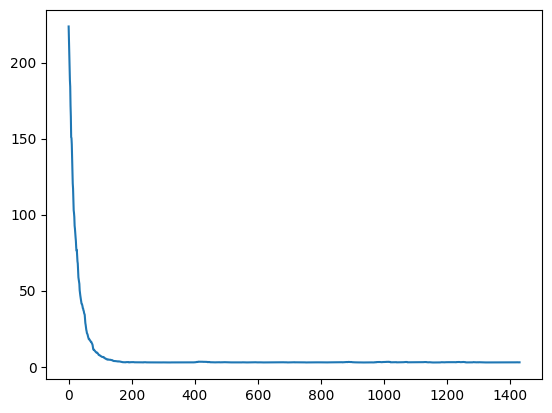

In [1356]:
sns.lineplot(mse)

**Выведите вектор весов, к которому сошелся метод.**

In [1364]:
# ваш код
mse_error(X@w, y)

2.885716699267209

**Выведите среднеквадратичную ошибку на последней итерации.**

In [1358]:
# ваш код